<a href="https://colab.research.google.com/github/matsunagalab/tutorial_analyzingMDdata/blob/main/04_md_superpose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superpose of trajectory

## MDTrajのインストール

In [4]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:12
🔁 Restarting kernel...


In [1]:
!conda install -c conda-forge mdtraj

Channels:
 - conda-forge
Platform: linux-64
Solving environment: - \ | / done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.7.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - mdtraj


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    astunparse-1.6.3           |     pyhd8ed1ab_0          15 KB  conda-forge
    blosc-1.21.5               |       hc2324a3_1          48 KB  conda-forge
    c-blosc2-2.14.4            |       hb4ffafa_1         329 KB  conda-forge
    ca-certificates-2024.8.30  |       hbcca054_0         155 KB  conda-forge
    certifi-2024.8.30          |     pyhd8ed1ab_0         160 KB  conda-forge
    hdf5-1.14.3                |nompi_h4f84152_100         3.7 MB  conda-forge
    libaec-1.

## T4 LysozymeのMDデータの取得

比較のために wildtype と mutant 関連のデータをダウンロードする。

In [1]:
!gdown 1Lu22Z7ARKSws77sBaYr84iCcQsnTHId9
!gdown 1Eh0SSSxgAmv7LI2NvAY43tLMLI63lSa-

!gdown 1Lwx8zhPSBMApi94QZtpLW7pMUzj2wDhv
!gdown 1EdM1H1C3CwA2vH7E4-59jrqQB6kQkYek

Downloading...
From: https://drive.google.com/uc?id=1Lu22Z7ARKSws77sBaYr84iCcQsnTHId9
To: /content/wildtype.pdb
100% 214k/214k [00:00<00:00, 107MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1Eh0SSSxgAmv7LI2NvAY43tLMLI63lSa-
From (redirected): https://drive.google.com/uc?id=1Eh0SSSxgAmv7LI2NvAY43tLMLI63lSa-&confirm=t&uuid=02ff79a6-4b1d-4563-a76f-51d0ad4c2f4f
To: /content/wildtype.dcd
100% 318M/318M [00:01<00:00, 224MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Lwx8zhPSBMApi94QZtpLW7pMUzj2wDhv
To: /content/mutant.pdb
100% 214k/214k [00:00<00:00, 70.6MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1EdM1H1C3CwA2vH7E4-59jrqQB6kQkYek
From (redirected): https://drive.google.com/uc?id=1EdM1H1C3CwA2vH7E4-59jrqQB6kQkYek&confirm=t&uuid=be5ed7a0-2c51-46f6-a196-01f58cea7f54
To: /content/mutant.dcd
100% 317M/317M [00:07<00:00, 43.8MB/s]


## トラジェクトリの重ね合わせ


In [8]:
import mdtraj as md
import numpy as np

w_ref = md.load('/content/wildtype.pdb')
w = md.load('/content/wildtype.dcd', top='/content/wildtype.pdb')

In [9]:
w.superpose(w_ref, 0)

<mdtraj.Trajectory with 10000 frames, 2643 atoms, 164 residues, and unitcells at 0x7b921daeb220>

In [10]:
m_ref = md.load('/content/mutant.pdb')
m = md.load('/content/mutant.dcd', top='/content/mutant.pdb')

In [11]:
m.superpose(m_ref, 0)

<mdtraj.Trajectory with 10000 frames, 2636 atoms, 164 residues, and unitcells at 0x7b924bfb4df0>

In [12]:
# save superposed trajectories
w.save('wildtype_superposed.dcd')
m.save('mutant_superposed.dcd')

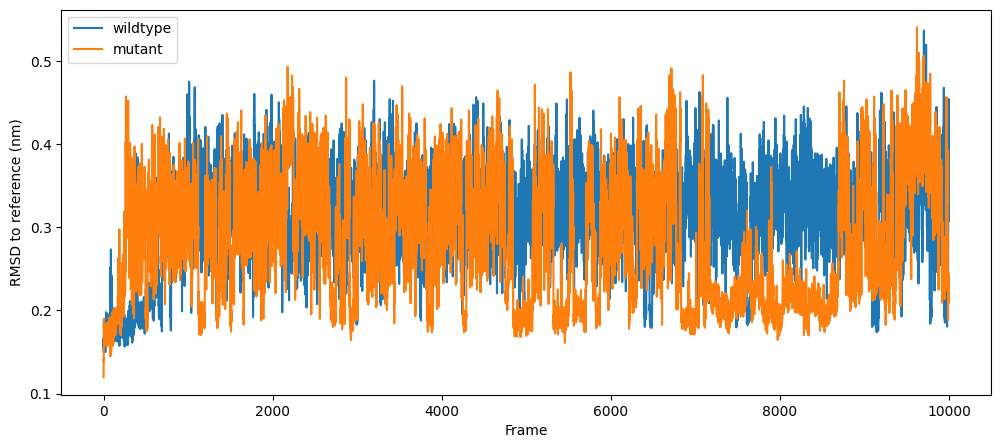

In [13]:
import matplotlib.pyplot as plt

# Compute RMSD of each frame to the reference
w_rmsd = md.rmsd(w, w_ref)
m_rmsd = md.rmsd(m, m_ref)

# Plot the RMSD
plt.figure(figsize=(12, 5))
plt.plot(w.time, w_rmsd, label="wildtype")
plt.plot(m.time, m_rmsd, label="mutant")
plt.legend()
plt.xlabel('Frame')
plt.ylabel('RMSD to reference (nm)')
plt.show()